In [10]:
from __future__ import print_function
import tensorflow.keras,sklearn
# suppress tensorflow compilation warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow.compat.v1 as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
seed=4
np.random.seed(seed) # fix random seed
tf.compat.v1.set_random_seed(seed)
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import requests
import io
from PIL import Image, ImageTk
import tkinter as tk
from tkinter.filedialog import asksaveasfilename
from tkinter.filedialog import askopenfilename
from numpy import asarray
import time
import tkinter as tk
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
print(pathlib.Path().absolute())

C:\Users\Warsh\ML_Notebooks_edited\mlqdproj\proj_notebooks


# Simple Load and Draw
We load the trained CNNs in the cell below, and then run the bottom cell to have a window to pop up to draw in. Left click to either draw or erase, right click to switch between eraser and drawing, and hit esc to let the CNNs classify your drawing.

In [11]:
#load model from folder
possible_models = ['warshenstein','anna_banana','chris_is_a_model','jiinnet']
workdir = str(pathlib.Path().absolute())+'\\'
models=[]
for mod in possible_models:
    models.append(load_model(workdir+mod+'.h5'))

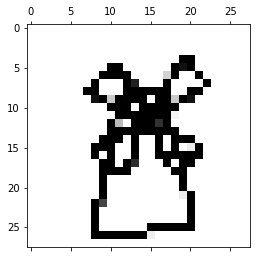

warshenstein classified drawing as windmill with 87.66% certainty
second guess: snowman with 5.38% certainty
third guess: monalisa with 3.68% certainty

anna_banana classified drawing as windmill with 98.66% certainty
second guess: snowman with 0.93% certainty
third guess: axe with 0.12% certainty

chris_is_a_model classified drawing as windmill with 98.08% certainty
second guess: snowman with 1.68% certainty
third guess: eiffeltower with 0.10% certainty

jiinnet classified drawing as windmill with 286.92% certainty
second guess: snowman with 0.00% certainty
third guess: airplane with 0.00% certainty




In [16]:
#pictionary cell
#run cell, draw with mouse, use right click to change between eraser and draw mode, esc to close window

drawing = False # true if mouse is pressed
mode = False # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
brushsize=10
ersize=20

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    #this is eraser
    if event == cv2.EVENT_RBUTTONDOWN:
        mode = not(mode)
        ix,iy = x,y
            
    #and this is for drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.circle(img,(x,y),ersize,(255,255,255),-1)
            else:
                cv2.circle(img,(x,y),brushsize,(0,0,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.circle(img,(x,y),ersize,(255,255,255),-1)
        else:
            cv2.circle(img,(x,y),brushsize,(0,0,0),-1)
            
#create image and a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('draw something!')
cv2.circle(img,(255,255),400,(255,255,255),-1)
cv2.setMouseCallback('draw something!',draw_circle)
while(1):
    cv2.imshow('draw something!',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

#convert to usable
rgb_weights = [0.2989, 0.5870, 0.1141]
gs_img = abs(255-np.dot(img[...,:3], rgb_weights))
gs_img /= 255
lowres = cv2.resize(gs_img, dsize=(28, 28), interpolation=cv2.INTER_LINEAR)

#close windows
cv2.destroyAllWindows()

#look at 28x28 version of drawing
plt.matshow(lowres.reshape(28,28),cmap='binary')
plt.show()

#reshape to 4D array, predict with the trained CNN
lowres_rshp=lowres.reshape(1,28,28,1)

yokay=['airplane', 'monalisa', 'dragon', 'giraffe', 'axe', 'banana', 'eiffeltower', 'snail', 'windmill', 'snowman']
cat1s=[]
cert1s=[]
cat2s=[]
cert2s=[]
cat3s=[]
cert3s=[]
for model in models:
    class_cert=model.predict(lowres_rshp)
    cat1=class_cert.argmax(1)
    cat1s.append(cat1[0])
    cert1 = 100*class_cert[0,cat1[0]]
    cert1s.append(cert1)
    class_cert[0,cat1[0]]=0
    cat2=class_cert.argmax(1)
    cat2s.append(cat2[0])
    cert2 = 100*class_cert[0,cat2[0]]
    cert2s.append(cert2)
    class_cert[0,cat2[0]]=0
    cat3=class_cert.argmax(1)
    cat3s.append(cat3[0])
    cert3 = 100*class_cert[0,cat3[0]]
    cert3s.append(cert3)
print(possible_models[0]+' classified drawing as ' + yokay[cat1s[0]] + ' with %.2f%% certainty\n'%cert1s[0] + 
                'second guess: ' + yokay[cat2s[0]] + ' with %.2f%% certainty\n'%cert2s[0] +
               'third guess: ' + yokay[cat3s[0]] + ' with %.2f%% certainty\n\n'%cert3s[0] +
               possible_models[1]+' classified drawing as ' + yokay[cat1s[1]] + ' with %.2f%% certainty\n'%cert1s[1] + 
                'second guess: ' + yokay[cat2s[1]] + ' with %.2f%% certainty\n'%cert2s[1] +
               'third guess: ' + yokay[cat3s[1]] + ' with %.2f%% certainty\n\n'%cert3s[1] +
               possible_models[2]+' classified drawing as ' + yokay[cat1s[2]] + ' with %.2f%% certainty\n'%cert1s[2] + 
                'second guess: ' + yokay[cat2s[2]] + ' with %.2f%% certainty\n'%cert2s[2] +
               'third guess: ' + yokay[cat3s[2]] + ' with %.2f%% certainty\n\n'%cert3s[2] +
               possible_models[3]+' classified drawing as ' + yokay[cat1s[3]] + ' with %.2f%% certainty\n'%cert1s[3] + 
                'second guess: ' + yokay[cat2s[3]] + ' with %.2f%% certainty\n'%cert2s[3] +
               'third guess: ' + yokay[cat3s[3]] + ' with %.2f%% certainty\n\n'%cert3s[3])